In [1]:
# Import the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import h2o
from h2o.automl import H2OAutoML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [2]:

# Load the "Crime_Data_from_2020_to_Present" dataset
crime_data_2020_present = pd.read_csv(r"C:\Users\realv\Downloads\Compressed\archive\Crime_Data_from_2020_to_Present.csv")

# Load the "Crime_Data_from_2010_to_2019" dataset
crime_data_2010_2019 = pd.read_csv(r"C:\Users\realv\Downloads\Compressed\archive\Crime_Data_from_2010_to_2019.csv")

# Concatenate the two datasets vertically if needed
crime_data = pd.concat([crime_data_2020_present, crime_data_2010_2019], ignore_index=True)


In [3]:
# Save the combined CSV file to a specified directory

crime_data.to_csv(r'C:\Users\realv\Downloads\Compressed\archive\Crime_Data.csv', index=False)

In [4]:
# Display the first few rows of the combined dataset
print(crime_data.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   3.0   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   1.0   
2  201220752  09/16/2020 12:00:00 AM  09/16/2020 12:00:00 AM      1230  12.0   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730  15.0   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415  19.0   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2  77th Street         1259         2     745   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ...  Status Desc  \
0                           BATTERY - SIMPLE ASSAULT  ...  Adult Other   
1                           BATTERY - SIMPLE ASSAULT  ...  Invest Cont   
2 

In [5]:
# Get information about the combined dataset
print(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444416 entries, 0 to 2444415
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            float64
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
 28  AREA        

In [6]:
# Check the shape of the combined dataset (number of rows and columns)
print(crime_data.shape)

(2444416, 29)


In [7]:
# Get summary statistics of the combined dataset
print(crime_data.describe())

              DR_NO      TIME OCC           AREA   Rpt Dist No      Part 1-2  \
count  2.444416e+06  2.444416e+06  326213.000000  2.444416e+06  2.444416e+06   
mean   1.556376e+08  1.358548e+03      10.797191  1.151201e+03  1.441972e+00   
std    3.327799e+07  6.475771e+02       6.039220  6.017067e+02  4.966214e-01   
min    8.170000e+02  1.000000e+00       1.000000  1.000000e+02  1.000000e+00   
25%    1.302178e+08  9.300000e+02       6.000000  6.420000e+02  1.000000e+00   
50%    1.603069e+08  1.430000e+03      11.000000  1.181000e+03  1.000000e+00   
75%    1.816152e+08  1.900000e+03      16.000000  1.663000e+03  2.000000e+00   
max    9.102204e+08  2.359000e+03      21.000000  2.199000e+03  2.000000e+00   

             Crm Cd      Vict Age     Premis Cd  Weapon Used Cd      Crm Cd 1  \
count  2.444416e+06  2.444416e+06  2.444355e+06   831194.000000  2.444404e+06   
mean   5.075575e+02  3.153336e+01  3.092229e+02      370.137159  5.073679e+02   
std    2.106469e+02  2.080149e+01  2

In [8]:
# Check for any missing values
print(crime_data.isnull().sum())

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA              2118203
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            272661
Vict Age                0
Vict Sex           239231
Vict Descent       239283
Premis Cd              61
Premis Desc           300
Weapon Used Cd    1613222
Weapon Desc       1613223
Status                  3
Status Desc             0
Crm Cd 1               12
Crm Cd 2          2277709
Crm Cd 3          2439982
Crm Cd 4          2444282
LOCATION                0
Cross Street      2030382
LAT                     0
LON                     0
AREA               326213
dtype: int64


In [9]:
# Create a dictionary mapping each unique Area value to its corresponding Area No value
area_dict = dict(zip(crime_data['AREA NAME'].unique(), crime_data['AREA'].unique()))

In [10]:
# View the Dict
print(area_dict)

{'Southwest': 3.0, 'Central': 1.0, '77th Street': 12.0, 'N Hollywood': 15.0, 'Mission': 19.0, 'Southeast': 18.0, 'Devonshire': 17.0, 'Harbor': 5.0, 'West Valley': 10.0, 'West LA': 8.0, 'Pacific': 14.0, 'Wilshire': 7.0, 'Hollywood': 6.0, 'Northeast': 11.0, 'Hollenbeck': 4.0, 'Olympic': 20.0, 'Newton': 13.0, 'Topanga': 21.0, 'Foothill': 16.0, 'Rampart': 2.0, 'Van Nuys': 9.0}


In [11]:
# Fill the missing values in the AREA column based on the AREA NAME column
crime_data['AREA'] = crime_data['AREA'].fillna(crime_data['AREA NAME'].map(area_dict))

In [12]:
# Check for null values in the 'Area' column
crime_data['AREA'].isnull().sum()

0

In [13]:
# Replace '-' with NaN for the Vict Descent Column
crime_data['Vict Descent'] = crime_data['Vict Descent'].replace('-', pd.NA)

In [14]:
# Impute null and '-' values in Vict descent column with 'U'(Unknown)
crime_data['Vict Descent'].fillna('U', inplace=True)

In [15]:
# Check for null values in the 'Vict Descent' column
crime_data['Vict Descent'].isnull().sum()

0

In [16]:
# Replace 'H', '-' and null values with 'X'(Unknown) in 'victim_sex' column
crime_data['Vict Sex'] = crime_data['Vict Sex'].replace(['H', '-', None], 'X')


In [17]:
# Check for null values in the 'Vict Sext' column
crime_data['Vict Sex'].isnull().sum()

0

In [18]:
# Create a dictionary mapping 'Premis Cd' values to 'Premis Desc' values
premis_dict = dict(zip(crime_data['Premis Desc'].unique(), crime_data['Premis Cd'].unique()))


In [19]:
# Fill the missing values in the Premis Cd column based on the 'Premis Desc' column
crime_data['Premis Cd'] = crime_data['Premis Cd'].fillna(crime_data['Premis Desc'].map(premis_dict))

In [20]:
# Check for null values in the 'Premis Cd' column
crime_data['Premis Cd'].isnull().sum()

0

In [21]:
# Fill null values in 'Premis Desc' column using 'premis_dict' dictionary
crime_data['Premis Desc'] = crime_data['Premis Desc'].fillna(crime_data['Premis Cd'].map(premis_dict))

In [22]:
# Check for null values in the 'Premis Desc' column
crime_data['Premis Desc'].isnull().sum()

300

In [23]:
# Fill remaining null values in 'Premis Desc' column with a default value or custom value
crime_data['Premis Desc'].fillna('Unknown', inplace=True)


In [24]:
# Check for null values in the 'Premis Desc' column
crime_data['Premis Desc'].isnull().sum()

0

In [25]:
# Check for negative and invalid ages in 'Vict Age' column
invalid_ages = crime_data[(crime_data['Vict Age'] < 0) | (crime_data['Vict Age'] > 120)]

# Get the count of invalid ages
count_invalid_ages = invalid_ages.shape[0]

# Display the count of invalid ages
print("Count of Invalid Ages: ", count_invalid_ages)

Count of Invalid Ages:  651


In [26]:
# Calculate the mean of the valid ages
mean_valid_age = crime_data[crime_data['Vict Age'] >= 0]['Vict Age'].mean()

# Convert the mean age to integer
mean_valid_age = int(mean_valid_age)

#Display the mean valid age
print(mean_valid_age)

# Replace the invalid ages with the calculated mean using boolean indexing and loc
crime_data.loc[crime_data['Vict Age'] < 0, 'Vict Age'] = mean_valid_age


31


In [27]:
# Check for negative and invalid ages in 'Vict Age' column
invalid_ages2 = crime_data[(crime_data['Vict Age'] < 0) | (crime_data['Vict Age'] > 120)]

# Get the count of invalid ages
count_invalid_ages2 = invalid_ages2.shape[0]

# Display the count of invalid ages
print("Count of Invalid Ages: ", count_invalid_ages2)

Count of Invalid Ages:  0


In [28]:
# Fill the missing values in Weapon Used Cd and Weapon Desc columns

crime_data["Weapon Used Cd"].fillna(0,inplace=True)
crime_data["Weapon Desc"].fillna("NO WEAPON",inplace=True)

In [29]:
# Check for null values in 'Weapon Used Cd' and 'Weapon Desc' columns
crime_data['Weapon Used Cd'].isnull().sum()
crime_data['Weapon Desc'].isnull().sum()

0

In [30]:
# Fill the missing values in Cross Street column
crime_data["Cross Street"].fillna("Unknown",inplace=True)

In [31]:
#Check for null values in 'Cross Street' column
crime_data['Cross Street'].isnull().sum()


0

In [32]:
# Create a dictionary mapping each unique Crm Cd 1 value to its corresponding Crm Cd Desc value
crm_dict = dict(zip(crime_data['Crm Cd Desc'].unique(), crime_data['Crm Cd 1'].unique()))


In [33]:
# Fill the missing values in the Crm Cd 1 column based on the Crm Cd Desc columnv
crime_data['Crm Cd 1'] = crime_data['Crm Cd 1'].fillna(crime_data['Crm Cd Desc'].map(crm_dict))

In [34]:
# Check for null values in 'Crm Cd 1' column
crime_data['Crm Cd 1'].isnull().sum()

0

In [35]:
crime_data["Crm Cd 2"].fillna(0,inplace=True)
crime_data["Crm Cd 3"].fillna(0,inplace=True)
crime_data["Crm Cd 4"].fillna(0,inplace=True)

In [36]:
status_dict = dict(zip(crime_data['Status Desc'].unique(), crime_data['Status'].unique()))
crime_data['Status'] = crime_data['Status'].fillna(crime_data['Status Desc'].map(status_dict))

In [37]:
crime_data['Status'].isnull().sum()

3

In [38]:
print (status_dict)

{'Adult Other': 'AO', 'Invest Cont': 'IC', 'Adult Arrest': 'AA', 'Juv Arrest': 'JA', 'Juv Other': 'JO', 'UNK': nan}


In [39]:
crime_data["Status"].fillna("NA",inplace=True)

crime_data['Status'].isnull().sum()

0

In [40]:
# Drop the last column 'AREA' from all rows
crime_data.drop(crime_data.columns[-1], axis=1, inplace=True)


In [41]:
# Fill the missing values in Mocodes column
crime_data["Mocodes"].fillna("0",inplace=True)

In [42]:
# Check for null values in the 'Mocodes' column
crime_data['Mocodes'].isnull().sum()

0

In [43]:
# Check for any missing values
print(crime_data.isnull().sum())

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64


In [44]:
# Convert 'TIME OCC' column to string
#crime_data['TIME OCC'] = crime_data['TIME OCC'].astype(str)

# Add leading zeros to time values with less than 4 digits
#crime_data['TIME OCC'] = crime_data['TIME OCC'].str.zfill(4)

# Extract hours and minutes
#crime_data['Hour'] = crime_data['TIME OCC'].str[:2].astype(int)
#crime_data['Minute'] = crime_data['TIME OCC'].str[2:].astype(int)

# Filter out invalid values (hours > 23 or minutes > 59)
#valid_hours = (crime_data['Hour'] <= 23)
#valid_minutes = (crime_data['Minute'] <= 59)
#crime_data = crime_data[valid_hours & valid_minutes]

# Combine hours and minutes into time format
#crime_data['TIME OCC'] = crime_data['Hour'].map('{:02d}'.format) + ':' + crime_data['Minute'].map('{:02d}'.format)


# Print cleaned data
#print(crime_data)

In [45]:
print(crime_data['TIME OCC'])

0          2230
1           330
2          1230
3          1730
4           415
           ... 
2444411     400
2444412    1810
2444413    2100
2444414    1800
2444415    1615
Name: TIME OCC, Length: 2444416, dtype: int64


In [46]:
# Convert 'DATE OCC' and 'Date Rptd' columns to datetime
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], errors='coerce')
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'], errors='coerce')

# Check if all values in 'DATE OCC' and 'Date Rptd' columns are in datetime format
date_occ_valid = crime_data['DATE OCC'].notna().all()
date_rptd_valid = crime_data['Date Rptd'].notna().all()

if date_occ_valid and date_rptd_valid:
    print("All values in 'DATE OCC' and 'Date Rptd' columns are in datetime format.")
else:
    print("Some values in 'DATE OCC' and/or 'Date Rptd' columns are not in datetime format.")

# Print cleaned data
print(crime_data)


All values in 'DATE OCC' and 'Date Rptd' columns are in datetime format.
             DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  \
0         10304468 2020-01-08 2020-01-08      2230   3.0    Southwest   
1        190101086 2020-01-02 2020-01-01       330   1.0      Central   
2        201220752 2020-09-16 2020-09-16      1230  12.0  77th Street   
3        191501505 2020-01-01 2020-01-01      1730  15.0  N Hollywood   
4        191921269 2020-01-01 2020-01-01       415  19.0      Mission   
...            ...        ...        ...       ...   ...          ...   
2444411  190608903 2019-03-28 2019-03-28       400   6.0    Hollywood   
2444412  190715222 2019-08-15 2019-08-14      1810   7.0     Wilshire   
2444413  192004409 2019-01-06 2019-01-06      2100  20.0      Olympic   
2444414  191716777 2019-10-17 2019-10-16      1800  17.0   Devonshire   
2444415  190805435 2019-02-01 2019-02-01      1615   8.0      West LA   

         Rpt Dist No  Part 1-2  Crm Cd  \
0       

In [47]:
# Extract day, month, and year components from 'DATE OCC' column
crime_data['DAY OCC'] = crime_data['DATE OCC'].dt.day
crime_data['MONTH OCC'] = crime_data['DATE OCC'].dt.month
crime_data['YEAR OCC'] = crime_data['DATE OCC'].dt.year

# Display only 'DATE OCC', 'DAY OCC', 'MONTH OCC', and 'YEAR OCC' columns
columns_to_display = ['DATE OCC', 'DAY OCC', 'MONTH OCC', 'YEAR OCC']
print(crime_data[columns_to_display])

          DATE OCC  DAY OCC  MONTH OCC  YEAR OCC
0       2020-01-08        8          1      2020
1       2020-01-01        1          1      2020
2       2020-09-16       16          9      2020
3       2020-01-01        1          1      2020
4       2020-01-01        1          1      2020
...            ...      ...        ...       ...
2444411 2019-03-28       28          3      2019
2444412 2019-08-14       14          8      2019
2444413 2019-01-06        6          1      2019
2444414 2019-10-16       16         10      2019
2444415 2019-02-01        1          2      2019

[2444416 rows x 4 columns]


In [48]:
# Extract day, month, and year components from 'Date Rptd' column
crime_data['DAY RPTD'] = crime_data['Date Rptd'].dt.day
crime_data['MONTH RPTD'] = crime_data['Date Rptd'].dt.month
crime_data['YEAR RPTD'] = crime_data['Date Rptd'].dt.year

# Display only 'Date Rptd', 'DAY RPTD', 'MONTH RPTD', and 'YEAR RPTD' columns
columns_to_display = ['Date Rptd', 'DAY RPTD', 'MONTH RPTD', 'YEAR RPTD']
print(crime_data[columns_to_display])

         Date Rptd  DAY RPTD  MONTH RPTD  YEAR RPTD
0       2020-01-08         8           1       2020
1       2020-01-02         2           1       2020
2       2020-09-16        16           9       2020
3       2020-01-01         1           1       2020
4       2020-01-01         1           1       2020
...            ...       ...         ...        ...
2444411 2019-03-28        28           3       2019
2444412 2019-08-15        15           8       2019
2444413 2019-01-06         6           1       2019
2444414 2019-10-17        17          10       2019
2444415 2019-02-01         1           2       2019

[2444416 rows x 4 columns]


In [49]:
print(crime_data.shape)

(2444416, 34)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


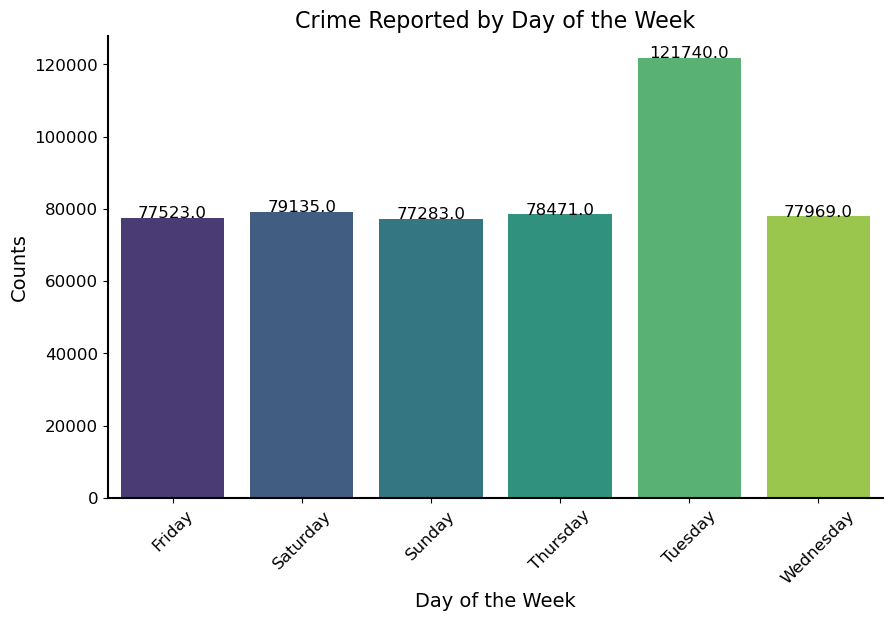

In [57]:

# Assuming that the 'Day' column in the crime_data DataFrame contains day values as integers (0-6)
# Map day integers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_data['Day of Week'] = crime_data['DAY OCC'].map(dict(enumerate(day_names)))

# Group by 'Day of Week' and count the number of occurrences
crime_by_day_of_week = crime_data.groupby('Day of Week').size().reset_index(name='Counts')

# Set the 'viridis' color palette
sns.set_palette('viridis')

# Plot a bar chart to visualize crime reported by day of the week
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day of Week', y='Counts', data=crime_by_day_of_week, palette='viridis')
plt.title('Crime Reported by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Counts', fontsize=14)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.legend().remove()

plt.show()


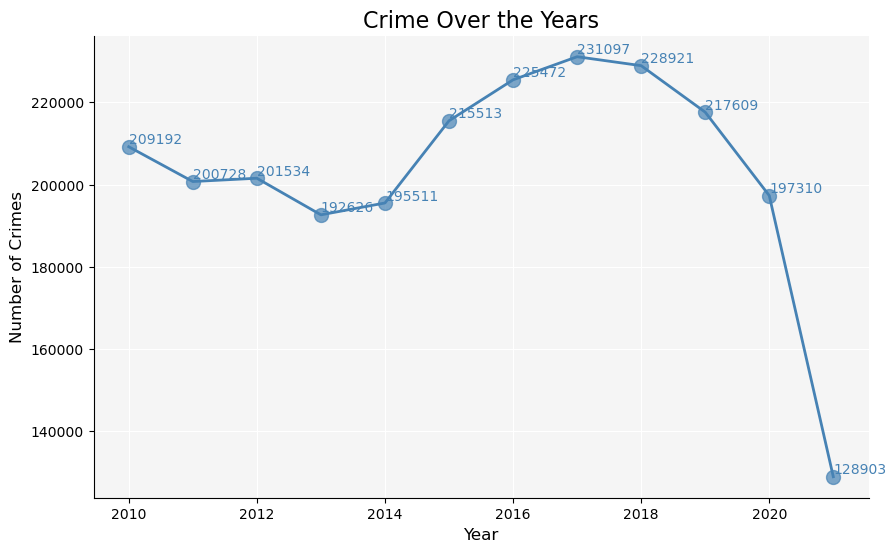

In [54]:
crime_by_year = crime_data['YEAR OCC'].value_counts().sort_index()

# Create a line plot to visualize crime over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=crime_by_year.index, y=crime_by_year.values, color='steelblue', linewidth=2)
plt.scatter(x=crime_by_year.index, y=crime_by_year.values, color='steelblue', s=100, alpha=0.7)
plt.title('Crime Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

# Add data point values as labels on the markers
for x, y in zip(crime_by_year.index, crime_by_year.values):
    plt.text(x, y, str(y), ha='left', va='bottom', fontsize=10, color='steelblue')

plt.gca().set_facecolor('whitesmoke')
plt.gca().grid(color='white')
plt.gca().set_axisbelow(True)
sns.despine()

plt.show()




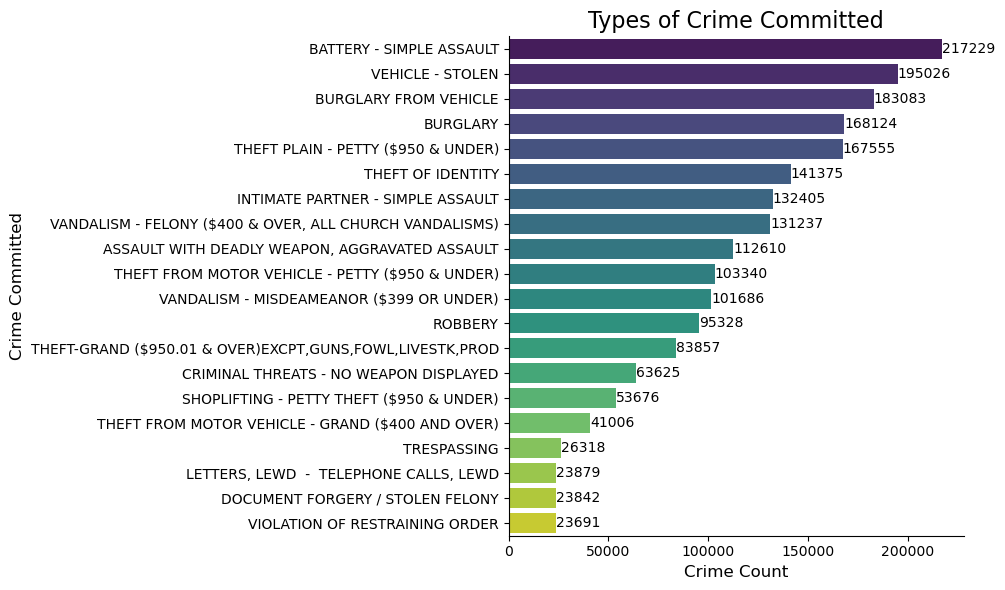

In [58]:

bar_color = 'viridis'  # Set color scheme to 'viridis'

# Create a vertical bar plot to visualize types of crime committed with the 'viridis' color scheme
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=crime_data["Crm Cd Desc"].value_counts().index[0:20], 
                 x=crime_data["Crm Cd Desc"].value_counts().head(20),
                 palette=bar_color)  # Use 'palette' parameter to set color scheme
plt.title('Types of Crime Committed', fontsize=16)
plt.xlabel('Crime Count', fontsize=12)
plt.ylabel('Crime Committed', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

# Add data labels on the bars
for i, v in enumerate(crime_data["Crm Cd Desc"].value_counts().head(20)):
    ax.text(v + 10, i, str(v), color='black', fontsize=10, ha='left', va='center')  # Add data labels

plt.tight_layout()  # Adjust spacing between bars
plt.show()


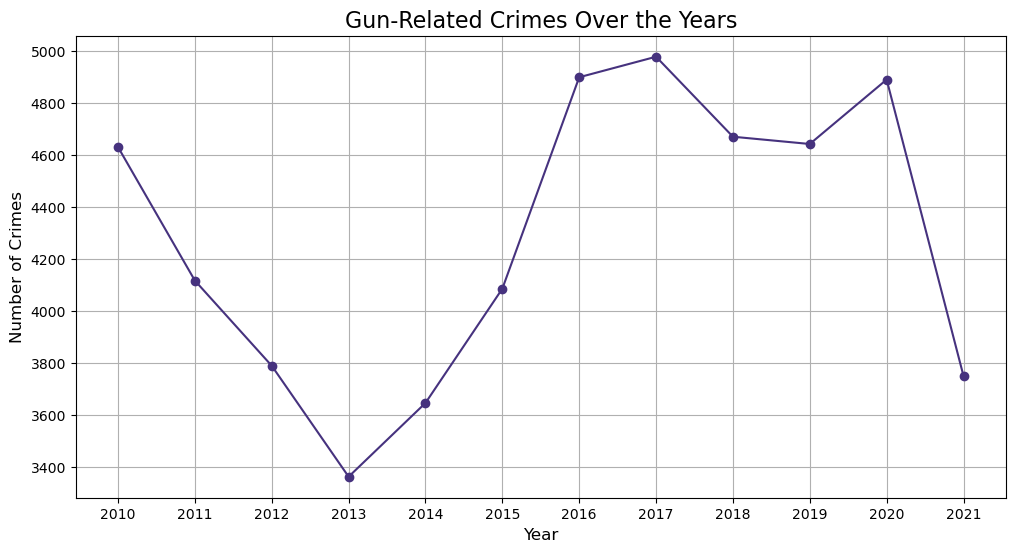

In [59]:
# Filter the data to only include rows with "Gun" in "Weapon Desc"
gun_crimes = crime_data[crime_data['Weapon Desc'].str.contains('GUN', case=False)]

# Group the filtered data by year and count the occurrences
gun_crimes_by_year = gun_crimes['YEAR OCC'].value_counts().sort_index()

# Create a line chart with larger figure size for better visibility
plt.figure(figsize=(12, 6))
plt.plot(gun_crimes_by_year.index, gun_crimes_by_year.values, marker='o')

# Set chart title and axis labels with larger font size for better readability
plt.title("Gun-Related Crimes Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

# Set x-axis ticks to integers for better formatting
plt.xticks(gun_crimes_by_year.index.astype(int))

# Add grid for better readability
plt.grid(True)

# Display the chart
plt.show()


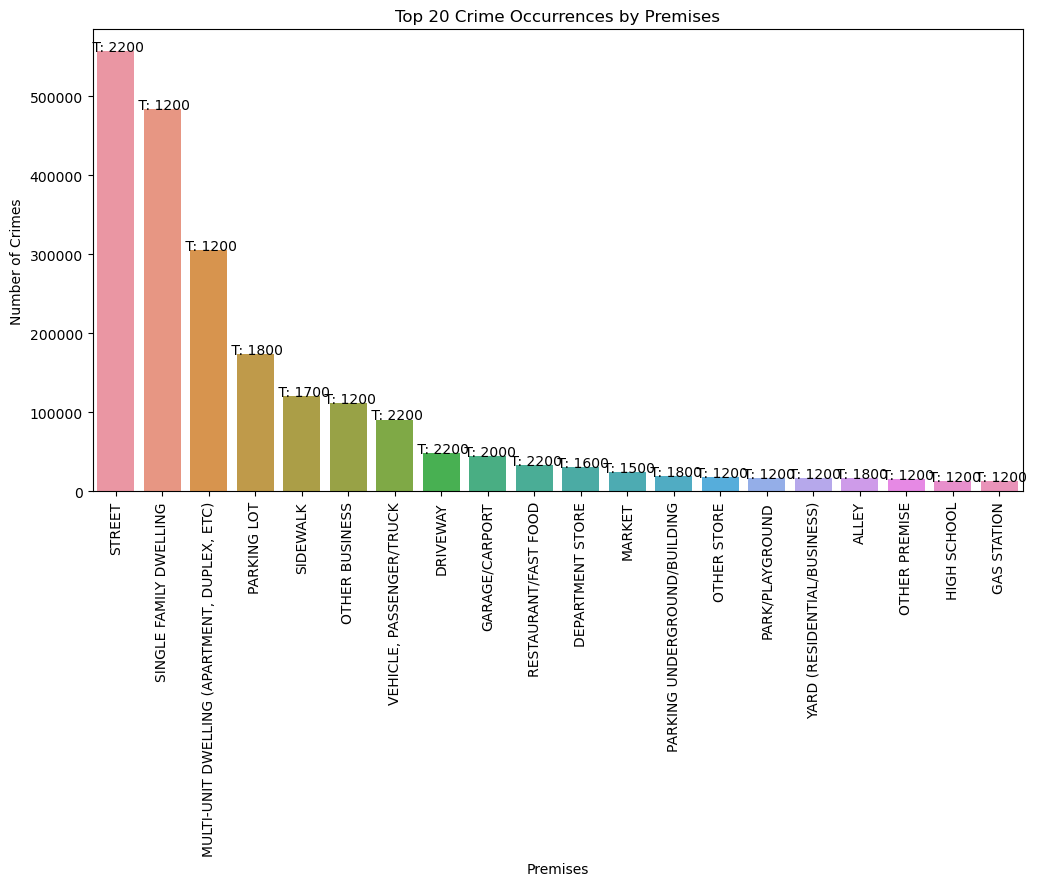

In [62]:
# Group the data by premise and count the occurrences
premise_counts = crime_data['Premis Desc'].value_counts()

# Select the top 20 premises with the highest crime occurrences
top_premises = premise_counts.nlargest(20).index

# Filter the data to include only the top 20 premises
top_premises_data = crime_data[crime_data['Premis Desc'].isin(top_premises)]

# Group the filtered data by premise and hour, and count the occurrences
premise_time_counts = top_premises_data.groupby(['Premis Desc', 'TIME OCC']).size().reset_index(name='Counts')

# Sort the premise_time_counts by counts in descending order
premise_time_counts = premise_time_counts.sort_values('Counts', ascending=False)

# Find the most frequent time of day for each premise
most_frequent_times = premise_time_counts.groupby('Premis Desc').apply(lambda x: x['TIME OCC'].iloc[0])

# Create a bar chart for top 20 premises
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=premise_counts[top_premises].index, y=premise_counts[top_premises].values)
plt.title("Top 20 Crime Occurrences by Premises with the most frequent time")
plt.xlabel("Premises")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)

# Add most frequent time of day as text on top of the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f' T: {most_frequent_times[top_premises].iloc[i]}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.show()



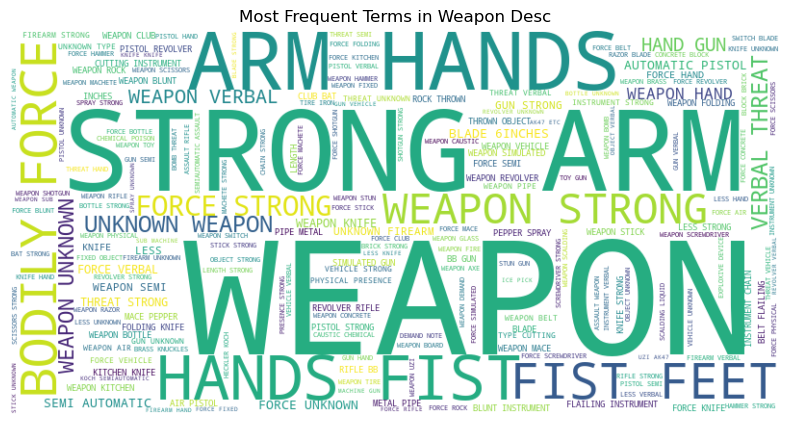

In [63]:
# Create a word cloud of most frequent terms in Weapon Desc column
weapon_desc_data = ' '.join(crime_data['Weapon Desc'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(weapon_desc_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Terms in Weapon Desc')
plt.show()


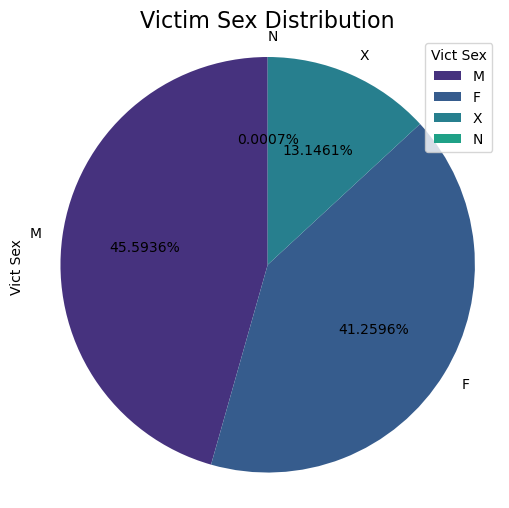

In [68]:
# Create a pie chart of the 'Vict Sex' feature
plt.figure(figsize=(6, 6))
sns.set_palette('viridis') # Set color palette
crime_data['Vict Sex'].value_counts().plot.pie(autopct='%1.4f%%', startangle=90)
plt.title('Victim Sex Distribution', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures a circular pie chart
plt.legend(title='Vict Sex', loc='best', labels=crime_data['Vict Sex'].value_counts().index)
plt.show()

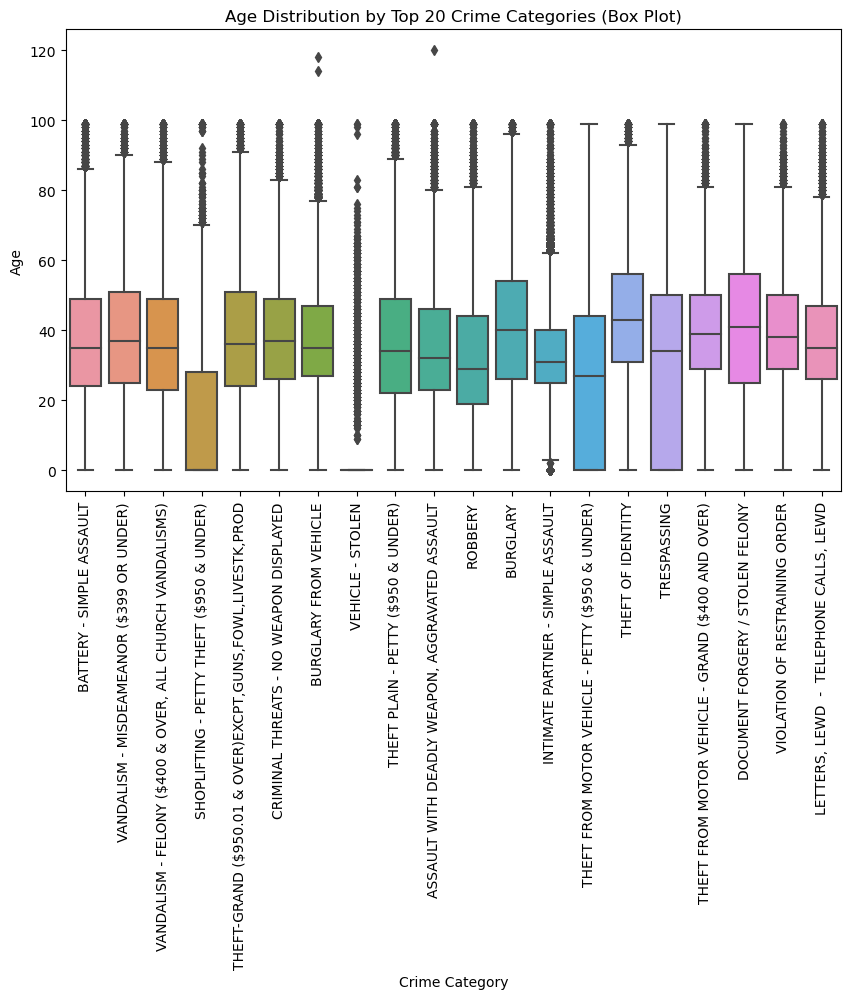

In [69]:
# Extract top 20 crime categories
top_20_crime_categories = crime_data['Crm Cd Desc'].value_counts().head(20).index.tolist()

# Filter crime_data to include only the top 20 crime categories
crime_data_top_20 = crime_data[crime_data['Crm Cd Desc'].isin(top_20_crime_categories)]

# Create a box plot of age by crime category using seaborn


plt.figure(figsize=(10, 6))
sns.boxplot(x='Crm Cd Desc', y='Vict Age', data=crime_data_top_20)
plt.title('Age Distribution by Top 20 Crime Categories (Box Plot)')
plt.xlabel('Crime Category')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


In [70]:
#Mapping Sex to numerical values i.e. M->1,F->2 and 0->3.********************* REFERENCE
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['M'],1)
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['F'],2)
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['N'],3)
crime_data['Vict Sex']=crime_data['Vict Sex'].replace(['X'],4)
crime_data['Vict Sex'].unique()

array([2, 1, 4, 3], dtype=int64)

In [71]:
#Mapping victim descent to numbers********************* REFERENCE
crime_data['Vict Descent']=crime_data['Vict Descent'].replace(['H', 'W', 'B', 'A', 'O', 'K', 'I', 'X', 'J', 'F', 'C', 'P', 'V', 'U', 'G', 'D', 'S', 'Z', 'L','-'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
crime_data['Vict Descent'].unique()

array([ 3,  1,  2,  8,  4,  5, 14, 11, 10,  6,  7, 13,  9, 15, 12, 17, 18,
       16, 19], dtype=int64)

In [72]:
corr = crime_data.corr()

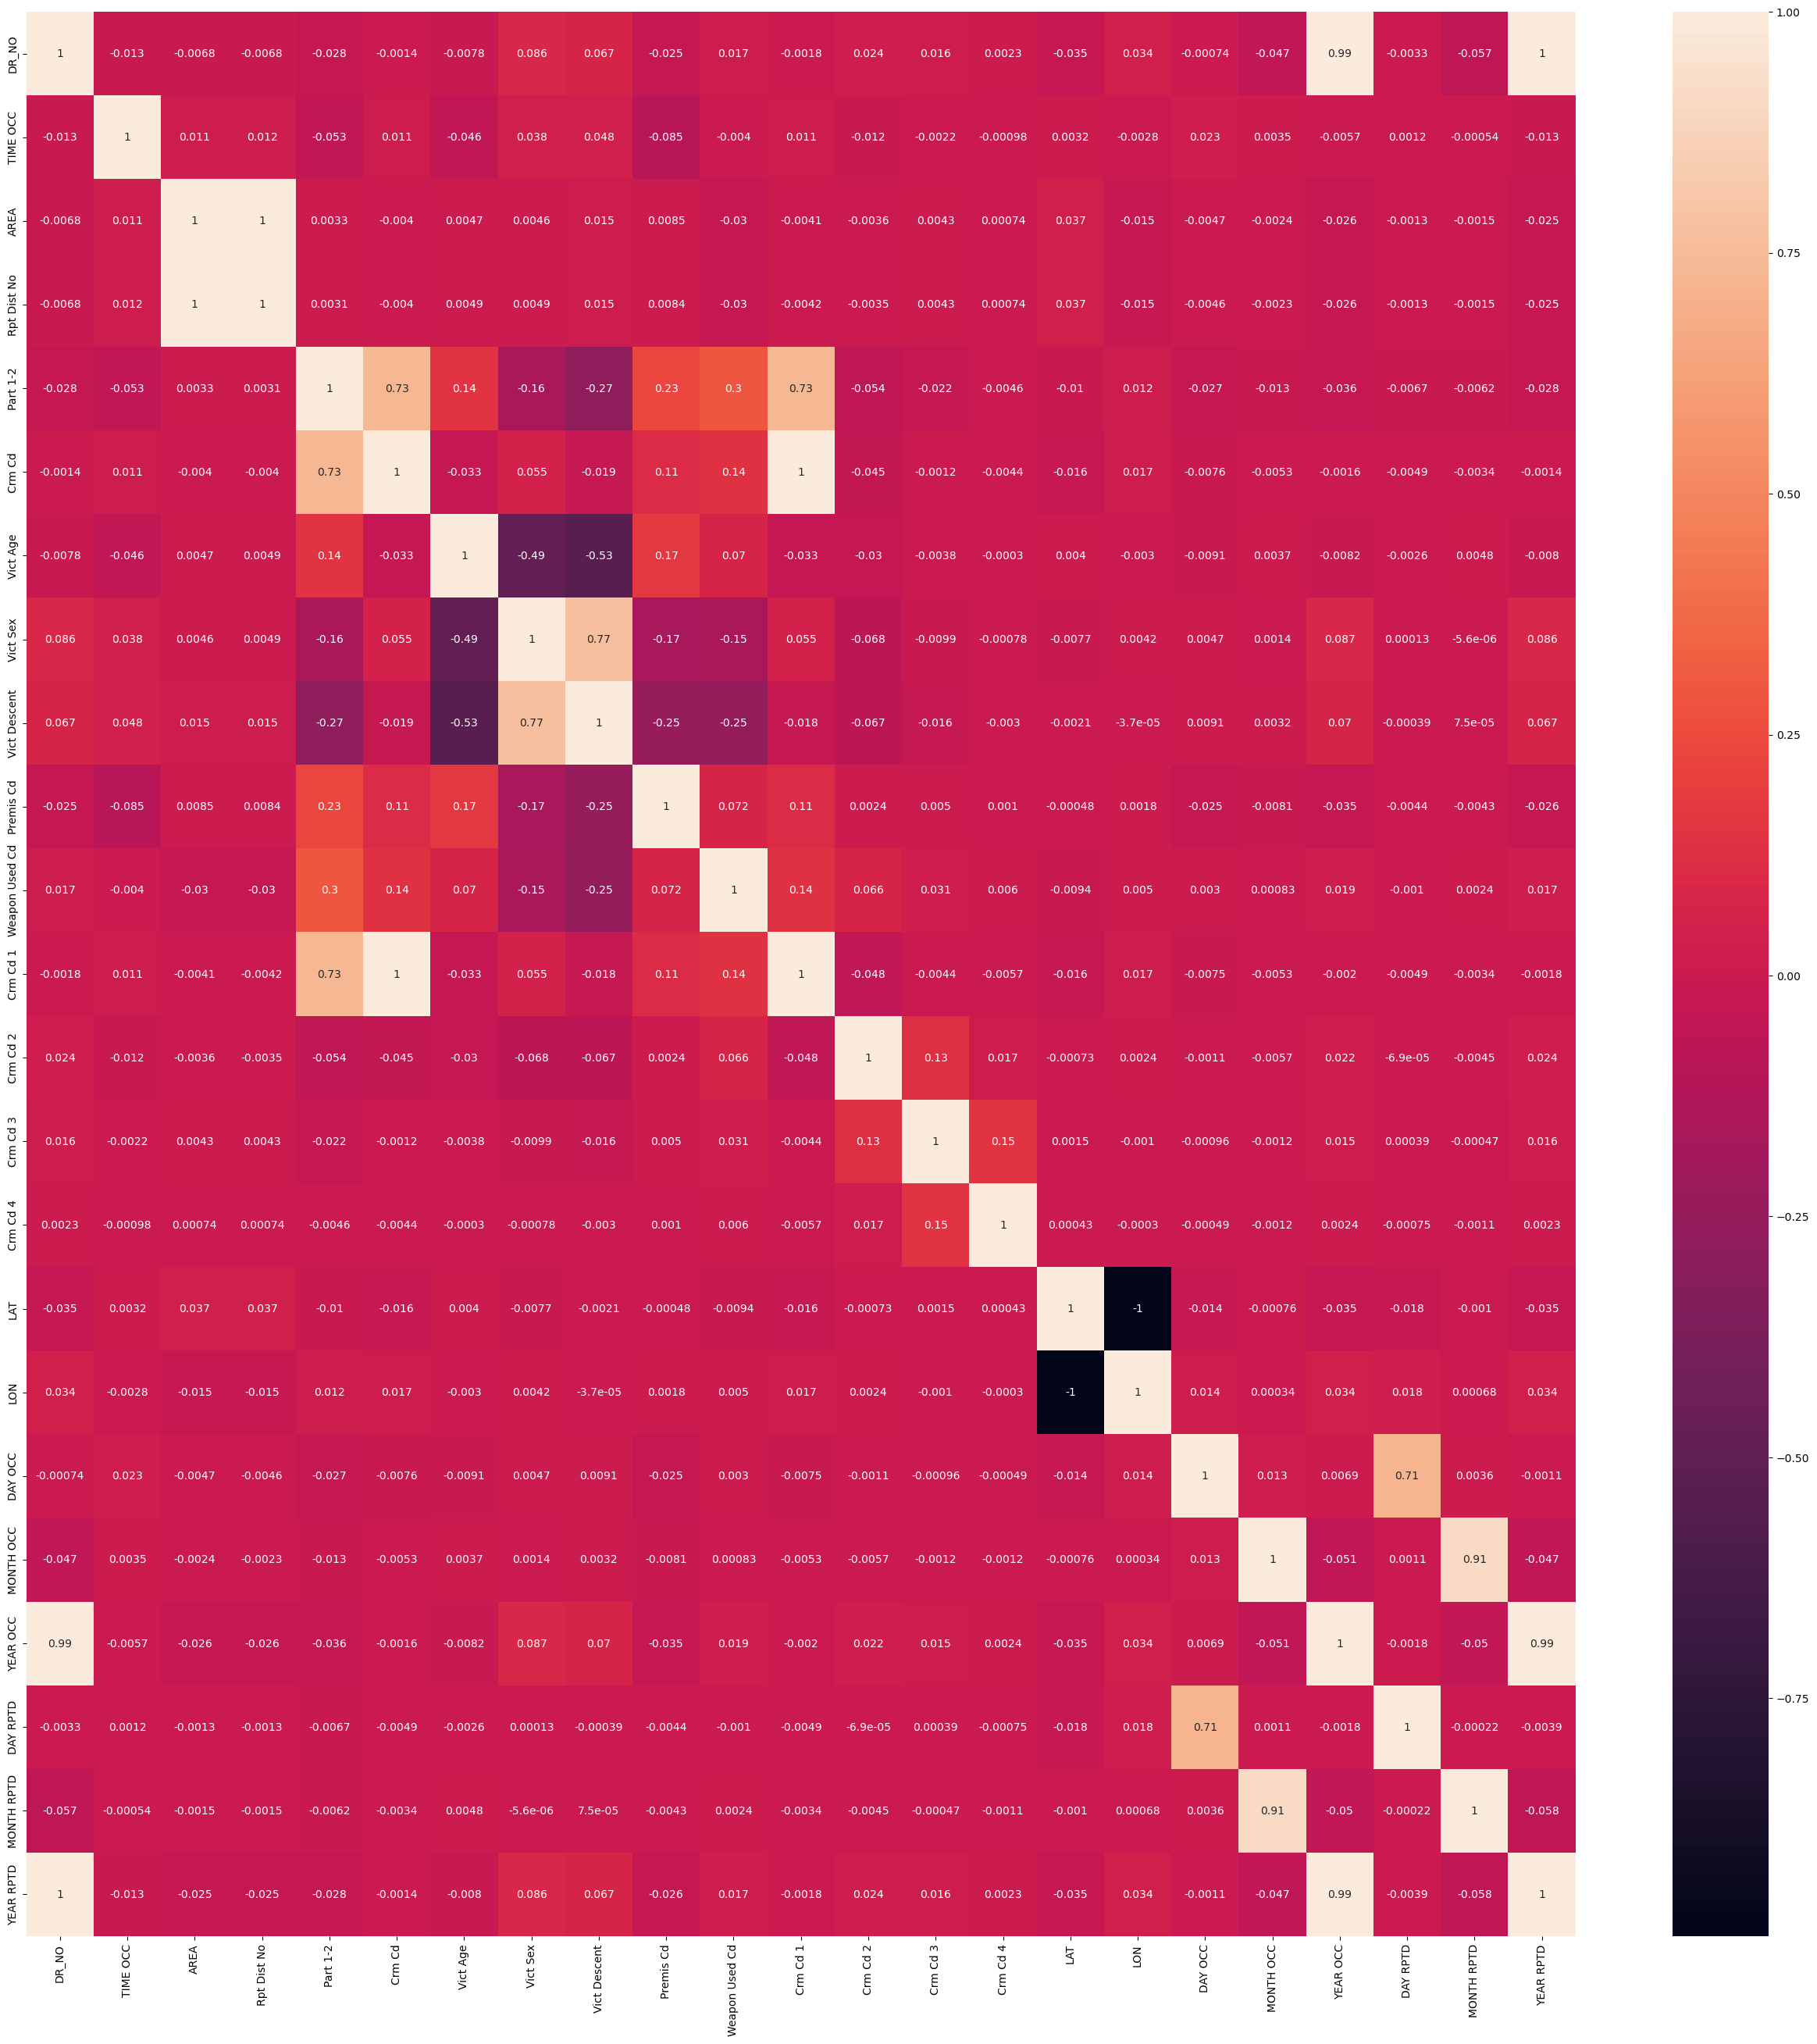

In [73]:
fig, ax = plt.subplots(figsize=(32, 32))
sns.heatmap(corr, annot=True)
plt.show()

In [86]:
corr_mask = (corr['AREA'] > 0.02) | (corr['AREA'] < -0.02)

corr_mask

DR_NO             False
TIME OCC          False
AREA               True
Rpt Dist No        True
Part 1-2          False
Crm Cd            False
Vict Age          False
Vict Sex          False
Vict Descent      False
Premis Cd         False
Weapon Used Cd     True
Crm Cd 1          False
Crm Cd 2          False
Crm Cd 3          False
Crm Cd 4          False
LAT                True
LON               False
DAY OCC           False
MONTH OCC         False
YEAR OCC           True
DAY RPTD          False
MONTH RPTD        False
YEAR RPTD          True
Name: AREA, dtype: bool

In [91]:
# Convert 'Time Occ' column to string and format as %04d
crime_data['TIME OCC'] = crime_data['TIME OCC'].astype(str).str.zfill(4)

# Extract hour and minute components from 'Time Occ' column
crime_data['Hour'] = crime_data['TIME OCC'].str[:2].astype(int)
crime_data['Minute'] = crime_data['TIME OCC'].str[2:].astype(int)

# Define function to map time ranges to numerical codes
def map_time_slot(hour, minute):
    if hour < 6:
        return 0  # Night
    elif hour < 12:
        return 1  # Morning
    elif hour < 18:
        return 2  # Afternoon
    elif hour < 21:
        return 3  # Evening
    else:
        return 0  # Night (again)


crime_data_time = crime_data[['AREA','Rpt Dist No','Weapon Used Cd','LAT','YEAR OCC','YEAR RPTD',]]




In [92]:
# Create 'Time Slot' column based on time ranges
crime_data_time['Time Slot'] = crime_data.apply(lambda x: map_time_slot(x['Hour'], x['Minute']), axis=1)


C:\Users\realv\AppData\Local\Temp\ipykernel_24592\3824231141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_time['Time Slot'] = crime_data.apply(lambda x: map_time_slot(x['Hour'], x['Minute']), axis=1)


In [93]:
print(crime_data.head)

<bound method NDFrame.head of              DR_NO  Date Rptd   DATE OCC TIME OCC  AREA    AREA NAME  \
0         10304468 2020-01-08 2020-01-08     2230   3.0    Southwest   
1        190101086 2020-01-02 2020-01-01     0330   1.0      Central   
2        201220752 2020-09-16 2020-09-16     1230  12.0  77th Street   
3        191501505 2020-01-01 2020-01-01     1730  15.0  N Hollywood   
4        191921269 2020-01-01 2020-01-01     0415  19.0      Mission   
...            ...        ...        ...      ...   ...          ...   
2444411  190608903 2019-03-28 2019-03-28     0400   6.0    Hollywood   
2444412  190715222 2019-08-15 2019-08-14     1810   7.0     Wilshire   
2444413  192004409 2019-01-06 2019-01-06     2100  20.0      Olympic   
2444414  191716777 2019-10-17 2019-10-16     1800  17.0   Devonshire   
2444415  190805435 2019-02-01 2019-02-01     1615   8.0      West LA   

         Rpt Dist No  Part 1-2  Crm Cd  \
0                377         2     624   
1                163 

In [ ]:
# Drop intermediate columns
crime_data_time.drop(columns=['TIME OCC'],axis=1)


In [94]:
# Setting the features X and y
X = crime_data_time.drop(columns=['Time Slot'])
y = crime_data_time['AREA']


In [95]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on test set
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)

Accuracy of Logistic Regression: 0.9608843815710885


C:\Users\realv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a KNN classifier with a specified number of neighbors
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN:",accuracy)